<a href="https://colab.research.google.com/github/yleessam/2501_dl_env_colab/blob/main/4_%EC%99%80%EC%9D%B8%ED%92%88%EC%A7%88%EB%B6%84%EB%A5%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 레드와인의 화학적 성분과 등급을 기록한 데이터

https://archive.ics.uci.edu/dataset/186/wine+quality

In [22]:
import pandas as pd

redwine = pd.read_csv('winequality-red.csv', sep=';')
redwine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [23]:
from sklearn.model_selection import train_test_split

redwine_X = redwine.iloc[:, :-1].to_numpy()
redwine_y = pd.get_dummies(redwine.iloc[:,-1]).to_numpy()

#train-test
train_X, test_X, train_y, test_y = train_test_split(redwine_X, redwine_y, test_size=0.3, random_state=1)
train_X.shape, train_y.shape

((1119, 11), (1119, 6))

# 문제 정의 : 와인의 품질속성을 분류하기

# 모형 설계

1. Sequential()
- 레이어 1 : 뉴런 50, 활성화함수 relu
- 레이어 2 : 뉴런 50, 활성화함수 relu
- 레이어 3 : 뉴런 30, 활성화함수 relu
- 레이어 4 - 출력 6, softmax

2. compile()
- 최적화: adam
- 손실함수: 'categorical_crossentropy'
- 평가지표: 'accuracy'



In [24]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
# 1. 모델 정의
model = Sequential()
model.add(Input(shape=(11,)))  #입력층 11개 피처 지정
model.add(Dense(50, activation='relu')) #은닉층 레이어1
model.add(Dense(50, activation='relu')) #레이어2
model.add(Dense(30, activation='relu')) #레이어3
model.add(Dense(6, activation='softmax')) #출력층 레이어4
model

<Sequential name=sequential_3, built=True>

In [25]:
#모델 설정 - 컴파일
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model

<Sequential name=sequential_3, built=True>

# 훈련

In [26]:
#모델 훈련
model.fit( train_X, train_y, epochs=200, batch_size=50, verbose=1)

Epoch 1/200
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3432 - loss: 3.0960
Epoch 2/200
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4311 - loss: 1.3066 
Epoch 3/200
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4948 - loss: 1.2354 
Epoch 4/200
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4865 - loss: 1.1946 
Epoch 5/200
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4920 - loss: 1.1799 
Epoch 6/200
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4947 - loss: 1.1758 
Epoch 7/200
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5057 - loss: 1.1618 
Epoch 8/200
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4910 - loss: 1.1326 
Epoch 9/200
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5009 - loss: 1.1539 
Epoch 10/200
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4900 - loss: 1.1574  
Epoch 11/200
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5029 - loss: 1.1522 
Epoch 12/200
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 

# 평가

In [27]:
import numpy as np

pred = np.argmax(model.predict( test_X ), axis=1)
pred

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


array([2, 2, 3, 2, 4, 3, 3, 2, 4, 2, 3, 2, 2, 4, 2, 2, 2, 2, 2, 2, 2, 4,
       2, 3, 2, 3, 3, 2, 2, 2, 2, 4, 2, 3, 2, 2, 2, 2, 3, 2, 3, 2, 2, 3,
       2, 2, 2, 2, 2, 4, 2, 1, 3, 2, 2, 4, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2,
       4, 2, 2, 3, 2, 3, 2, 3, 2, 2, 3, 2, 2, 3, 3, 2, 2, 2, 2, 2, 2, 3,
       2, 3, 2, 3, 2, 3, 3, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 2, 4, 2, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 4, 3, 2, 2,
       3, 2, 3, 3, 2, 4, 2, 2, 2, 2, 2, 2, 3, 4, 2, 2, 2, 3, 2, 3, 2, 2,
       3, 4, 3, 3, 3, 2, 3, 3, 2, 2, 3, 3, 2, 2, 2, 3, 2, 2, 2, 2, 4, 2,
       2, 2, 2, 2, 2, 3, 2, 2, 3, 4, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 3, 2, 3, 2, 4, 2, 2, 2, 3, 3, 2, 2, 2, 3, 2, 2, 2, 2, 3, 2,
       2, 2, 2, 2, 3, 3, 2, 2, 4, 3, 2, 2, 3, 3, 2, 2, 3, 2, 2, 2, 2, 3,
       3, 2, 2, 4, 2, 2, 2, 2, 2, 2, 3, 3, 3, 2, 2, 2, 2, 3, 3, 2, 2, 2,
       2, 2, 3, 2, 2, 3, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 4, 2, 3, 2, 2, 2,
       3, 2, 2, 2, 2, 2, 2, 2, 3, 3, 2, 3, 2, 2, 2,

In [ ]:
# 실제값과 비교

np.argmax(test_y, axis=1)

array([2, 3, 3, 3, 3, 3, 3, 2, 2, 2, 3, 3, 3, 3, 3, 2, 3, 2, 2, 2, 3, 3,
       2, 3, 3, 3, 3, 3, 3, 4, 3, 3, 2, 3, 2, 3, 2, 4, 3, 2, 3, 2, 2, 3,
       2, 3, 2, 2, 2, 3, 2, 1, 4, 2, 2, 3, 3, 3, 2, 2, 2, 3, 2, 3, 2, 3,
       4, 3, 3, 3, 2, 3, 3, 3, 2, 2, 3, 3, 2, 3, 2, 2, 2, 3, 2, 2, 2, 4,
       2, 3, 2, 4, 2, 3, 2, 2, 3, 2, 0, 3, 2, 2, 2, 2, 2, 2, 3, 3, 2, 3,
       4, 2, 3, 3, 2, 4, 2, 2, 2, 2, 1, 4, 4, 2, 2, 2, 3, 2, 4, 4, 3, 2,
       4, 2, 3, 4, 2, 4, 3, 3, 2, 3, 3, 2, 3, 3, 3, 2, 3, 3, 3, 3, 2, 3,
       2, 4, 2, 3, 3, 3, 5, 3, 2, 2, 3, 3, 1, 2, 2, 3, 3, 3, 1, 4, 2, 3,
       2, 2, 2, 2, 3, 3, 2, 3, 3, 3, 4, 3, 1, 3, 2, 3, 3, 2, 3, 2, 1, 2,
       3, 2, 4, 2, 4, 2, 4, 3, 2, 2, 3, 2, 2, 4, 2, 3, 2, 3, 2, 2, 4, 3,
       2, 3, 2, 2, 3, 2, 1, 4, 4, 4, 3, 3, 4, 3, 3, 3, 3, 3, 2, 1, 3, 2,
       4, 3, 3, 5, 3, 2, 2, 2, 2, 1, 3, 3, 3, 2, 2, 1, 2, 2, 3, 2, 2, 2,
       1, 3, 2, 2, 3, 3, 2, 3, 2, 3, 3, 2, 2, 3, 2, 2, 3, 1, 1, 2, 3, 2,
       3, 2, 2, 2, 3, 3, 3, 2, 3, 4, 2, 2, 2, 2, 3,

In [ ]:
pd.crosstab(np.argmax(test_y, axis=1), pred, margins=True)

col_0,1,2,3,4,5,All
row_0,,,,,,
0,0,2,0,0,0,2
1,1,16,4,0,0,21
2,0,153,52,2,0,207
3,0,64,125,6,0,195
4,0,5,33,13,1,52
5,0,0,1,2,0,3
All,1,240,215,23,1,480


In [ ]:
loss, accuracy = model.evaluate(test_X, test_y)
loss, accuracy

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6541 - loss: 0.9750  


(1.032063603401184, 0.6083333492279053)

In [ ]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                      │ (None, 50)                  │             600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 50)                  │           2,550 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 30)                  │           1,530 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 6)                   │             186 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,600 (57.04 KB)

 Trainable params: 4,866 (19.01 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 9,734 (38.03 KB)

## fit()
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6663 - loss: 0.7488

- 모형의 구조를 변경
- 최적화 함수 바꾸기
- 에포크 횟수를 늘리거나

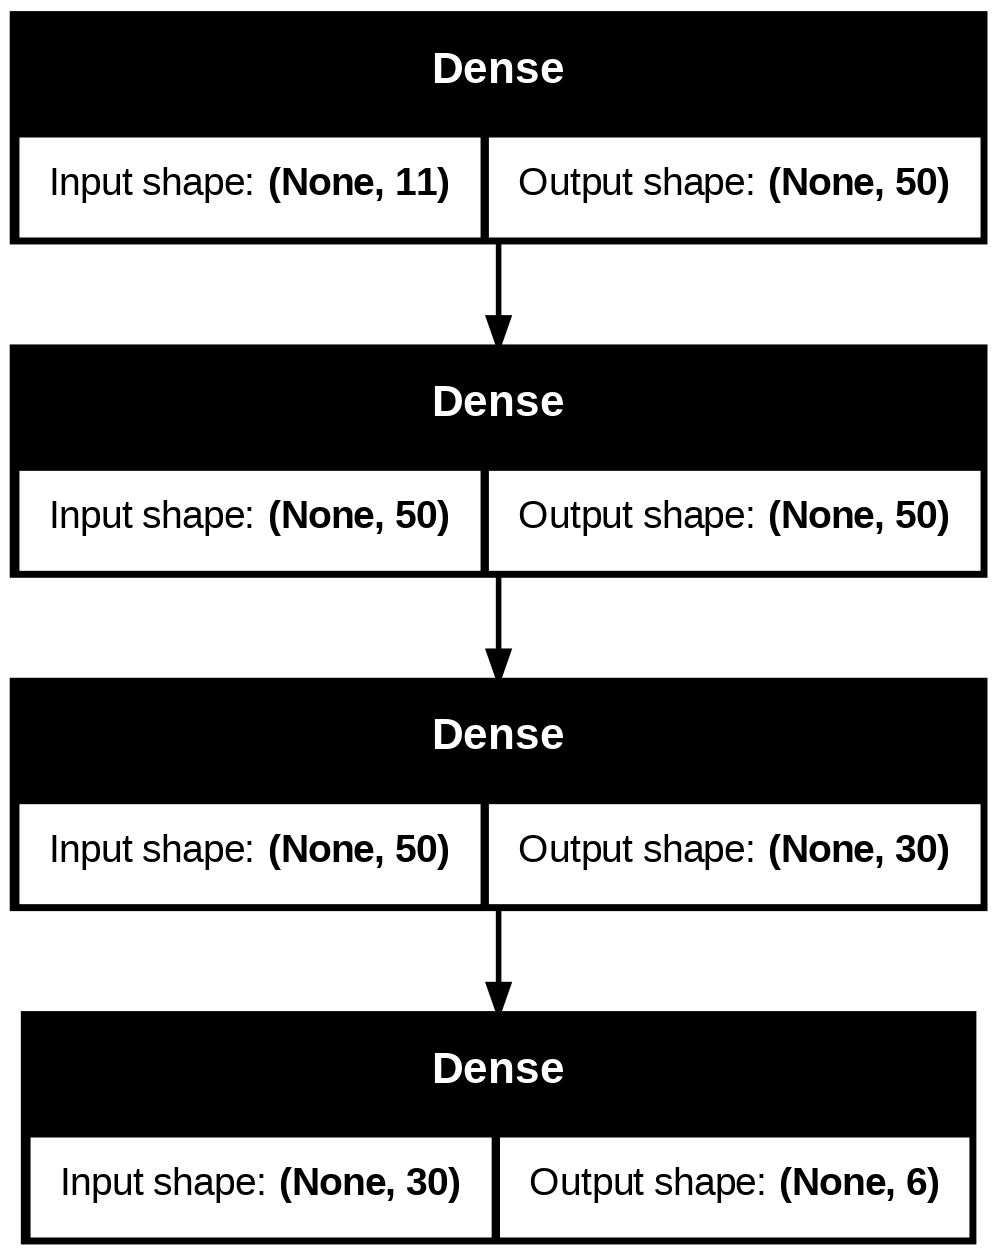

In [31]:
from keras.utils import plot_model

plot_model(model, show_shapes=True)
